1. My dataset consists of data science salaries from https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles 

2. Import dataset to Python: data = pd.read_csv("ds_salaries.csv") 

3. Descriptive statistics:
      Quantitative:
          For all entry level employees, the average salary was: $61643.32
          The average salary for 2020 was $95813.0 where the in 2021 it was $99853.79 indicating a 4.0% change.
      Categorical:
          The most common job title for companies located outside of the USA is: Data Scientist
          The lowest paid job title is 3D Computer Vision Researcher with a salary of $5409.0 compared to the highest paid job title of 
          Data Analytics Lead with a salary of $405000.0.

4. Transformation:
      Salary variance (standard deviation) by size of company: 
          L:  86157.0
          M:  59288.0
          S:  63462.0

5. Visualization


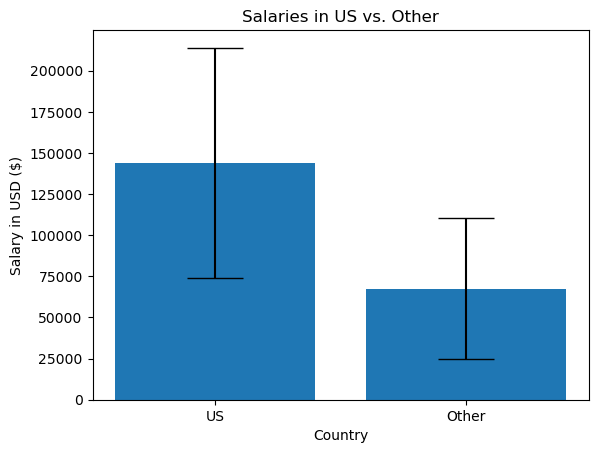

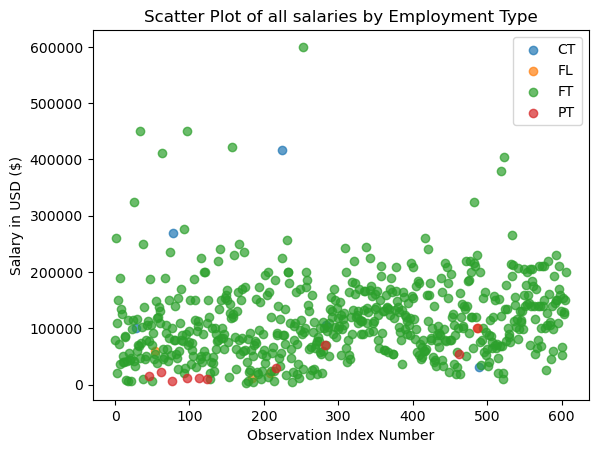

In [122]:
import pandas as pd 
import matplotlib.pyplot as plt 

print("1. My dataset consists of data science salaries from https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles \n")

data = pd.read_csv("ds_salaries.csv")
print('2. Import dataset to Python: data = pd.read_csv("ds_salaries.csv") \n')
print("3. Descriptive statistics:")  
print("      Quantitative:")

entryLevel = data[data['experience_level'] == "EN"] 
print("          For all entry level employees, the average salary was: $" + str(round(entryLevel['salary_in_usd'].mean(), 2)))

beforeSalary = data[data['work_year'] == 2020]
afterSalary = data[data['work_year'] == 2021]
print(f"          The average salary for 2020 was ${str(round(beforeSalary['salary_in_usd'].mean(), 2))} where the in 2021 it was ${str(round(afterSalary['salary_in_usd'].mean(), 2))} indicating a {str(round((afterSalary['salary_in_usd'].mean() - beforeSalary['salary_in_usd'].mean()) / beforeSalary['salary_in_usd'].mean(), 2) * 100)}% change.") 

print("      Categorical:")

notUS = data[data['company_location'] != "US"]
print("          The most common job title for companies located outside of the USA is: " + str(notUS['job_title'].mode()[0]))

salaryByTitle = data.groupby("job_title")["salary_in_usd"].mean()

lowestSalaryTitle = salaryByTitle.idxmin()
lowestSalary = salaryByTitle.min()
highestSalaryTitle = salaryByTitle.idxmax()
highestSalary = salaryByTitle.max()

print(f"          The lowest paid job title is {lowestSalaryTitle} with a salary of ${str(round(lowestSalary, 2))} compared to the highest paid job title of \n          {highestSalaryTitle} with a salary of ${str(round(highestSalary, 2))}.\n")
print("4. Transformation:")

salaryVarianceByCompanySize = data.groupby("company_size")['salary_in_usd'].std()
print("      Salary variance (standard deviation) by size of company: ")
for key, value in salaryVarianceByCompanySize.items():
    print("          " + key + ": ", str(round(value, 0)))

print("\n5. Visualization")

usSalaries = data[data["company_location"] == "US"]["salary_in_usd"]
otherSalaries = data[data["company_location"] != "US"]["salary_in_usd"]

plt.bar(['US', 'Other'], [usSalaries.mean(), otherSalaries.mean()], yerr=[usSalaries.std(), otherSalaries.std()], capsize=20)
plt.xlabel('Country')
plt.ylabel('Salary in USD ($)')
plt.title('Salaries in US vs. Other')
plt.show()

plt.clf()
print()

for type, groupData in data.groupby('employment_type'):
    plt.scatter(groupData.index, groupData['salary_in_usd'], label=type, alpha=0.7)

plt.xlabel('Observation Index Number')
plt.ylabel('Salary in USD ($)')
plt.title('Scatter Plot of all salaries by Employment Type')
plt.legend()
plt.show()

